<a href="https://colab.research.google.com/github/ismachy/Introduction-to-ML/blob/main/HW_5_Q_01_a_b_c.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import torch
#torch.set_printoptions(edgeitems=2, linewidth=75)

In [2]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

In [3]:
def model(t_u, w1, w2, b):
    return w2*t_u**2 + w1*t_u + b

In [4]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [5]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

In [6]:
shuffled_indices = torch.randperm(n_samples)

In [7]:
train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]
print(train_indices, val_indices)

tensor([2, 4, 6, 8, 9, 7, 3, 5, 1]) tensor([ 0, 10])


In [8]:
train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]

In [9]:
val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]

In [10]:
train_t_un = 0.1 * train_t_u
val_t_un = 0.1 * val_t_u

In [11]:
train_loss_list = []
val_loss_list = []
#epoch_list = []

In [12]:
def training_loop(n_epochs, optimizer, params, train_t_u, train_t_c, val_t_u, val_t_c):
    for epoch in range(1, n_epochs + 1):
        train_t_p = model(train_t_u, *params)
        train_loss = loss_fn(train_t_p, train_t_c)

        val_t_p = model(val_t_u, *params)
        val_loss = loss_fn(val_t_p, val_t_c)
        val_loss_list.append(val_loss.item())

        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
        train_loss_list.append(train_loss.item())

        if epoch <= 1 or epoch % 500 ==0:
            #epoch_list.append(epoch)
            print(f"Epoch {epoch}, Training loss {train_loss.item():.4f}, "f"Validation loss {val_loss.item():.4f}")
    return params

In [13]:
import torch.optim as optim

dir(optim)

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'NAdam',
 'Optimizer',
 'RAdam',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional',
 '_multi_tensor',
 'lr_scheduler',
 'swa_utils']

In [14]:
t_un = 0.1 * t_u

In [15]:
params = torch.tensor([1.0,1.0,0.0], requires_grad=True)
learning_rate = 0.1
optimizer = optim.Adam([params], lr = learning_rate)

training_loop(
    n_epochs=5000,
    optimizer = optimizer,
    params = params,
    train_t_u = train_t_un,
    train_t_c = train_t_c,
    val_t_u = val_t_un,
    val_t_c = val_t_c)

Epoch 1, Training loss 679.9107, Validation loss 657.2705
Epoch 500, Training loss 2.7188, Validation loss 3.6236
Epoch 1000, Training loss 2.3787, Validation loss 3.4174
Epoch 1500, Training loss 2.1544, Validation loss 3.2213
Epoch 2000, Training loss 2.0582, Validation loss 3.0761
Epoch 2500, Training loss 2.0317, Validation loss 2.9912
Epoch 3000, Training loss 2.0274, Validation loss 2.9532
Epoch 3500, Training loss 2.0271, Validation loss 2.9410
Epoch 4000, Training loss 2.0271, Validation loss 2.9384
Epoch 4500, Training loss 2.0270, Validation loss 2.9381
Epoch 5000, Training loss 2.0270, Validation loss 2.9380


tensor([ 2.3768,  0.2734, -9.8730], requires_grad=True)

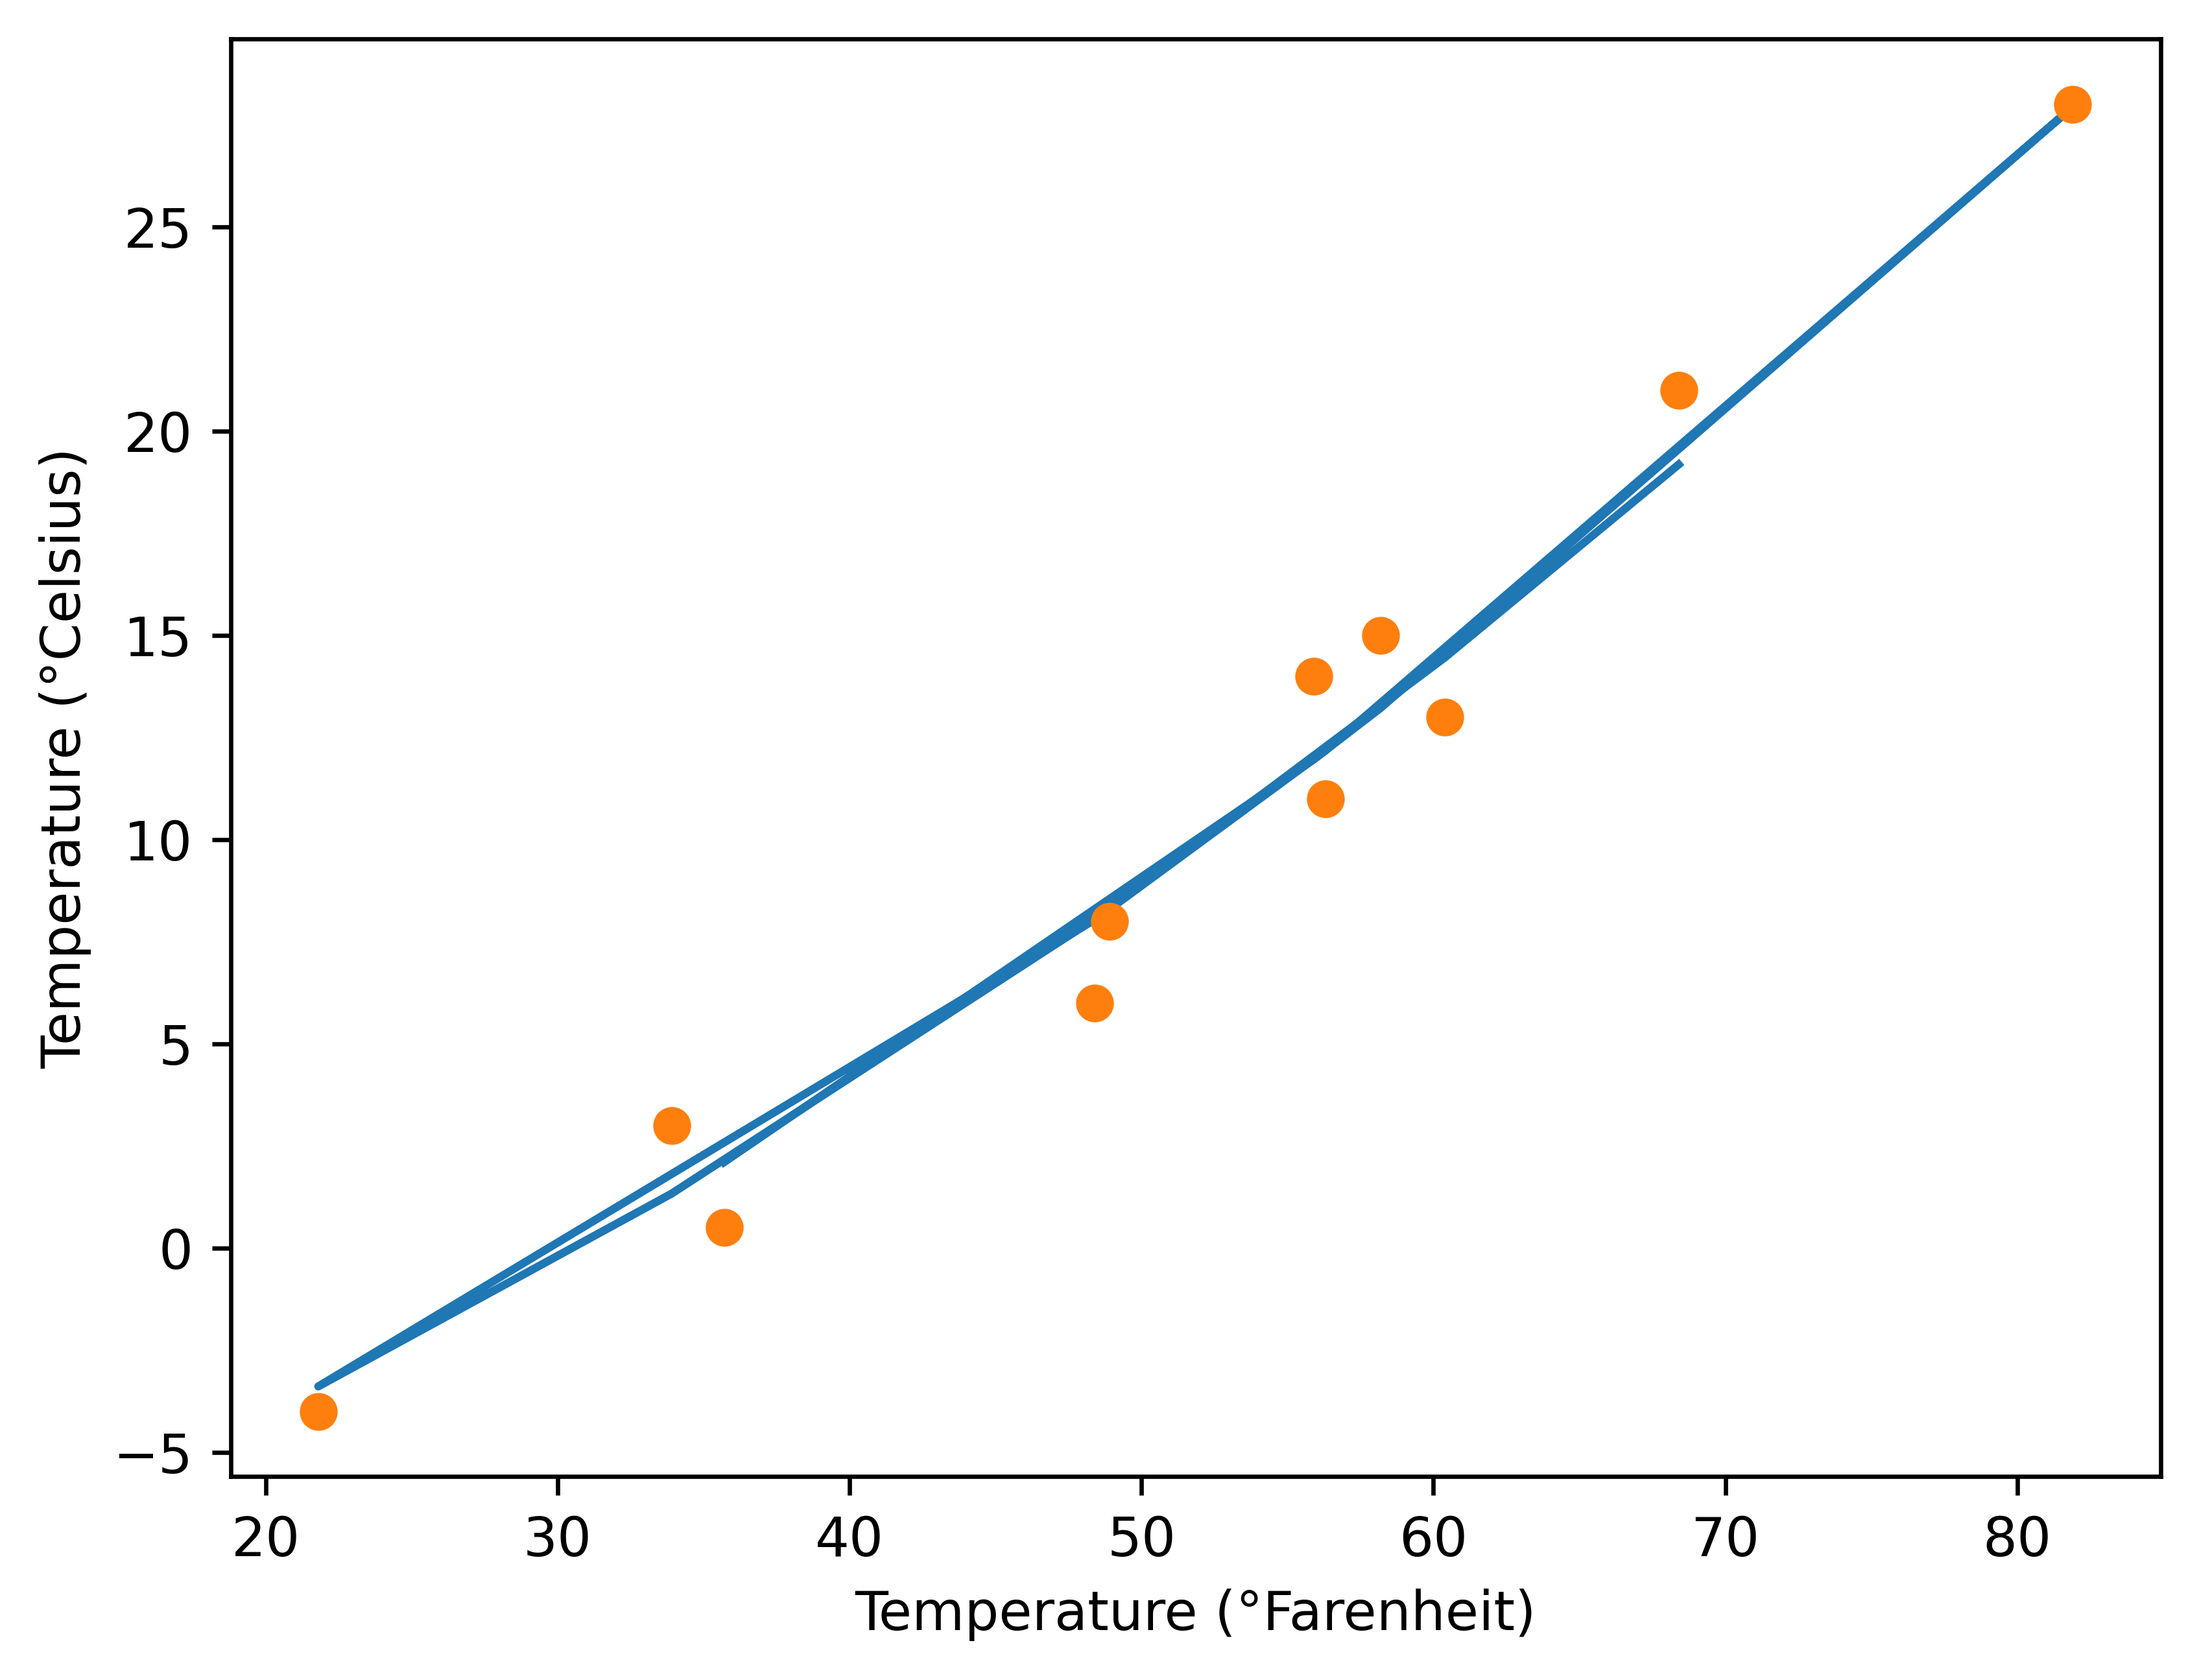

In [16]:
from matplotlib import pyplot as plt
#t_un = 0.1 * t_u
t_p = model(t_un, *params)
fig = plt.figure(dpi=600)
plt.xlabel('Temperature (°Farenheit)')
plt.ylabel('Temperature (°Celsius)')
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')

In [17]:
params = torch.tensor([1.0,1.0,0.0], requires_grad=True)
learning_rate = 0.01
optimizer = optim.Adam([params], lr = learning_rate)

training_loop(
    n_epochs=5000,
    optimizer = optimizer,
    params = params,
    train_t_u = train_t_un,
    train_t_c = train_t_c,
    val_t_u = val_t_un,
    val_t_c = val_t_c)

Epoch 1, Training loss 679.9107, Validation loss 657.2705
Epoch 500, Training loss 5.3216, Validation loss 11.2437
Epoch 1000, Training loss 3.6707, Validation loss 7.3132
Epoch 1500, Training loss 3.0450, Validation loss 5.0272
Epoch 2000, Training loss 2.8893, Validation loss 4.0640
Epoch 2500, Training loss 2.8212, Validation loss 3.7506
Epoch 3000, Training loss 2.7500, Validation loss 3.6574
Epoch 3500, Training loss 2.6673, Validation loss 3.6065
Epoch 4000, Training loss 2.5742, Validation loss 3.5531
Epoch 4500, Training loss 2.4738, Validation loss 3.4911
Epoch 5000, Training loss 2.3713, Validation loss 3.4208


tensor([ 0.6825,  0.4280, -5.5988], requires_grad=True)

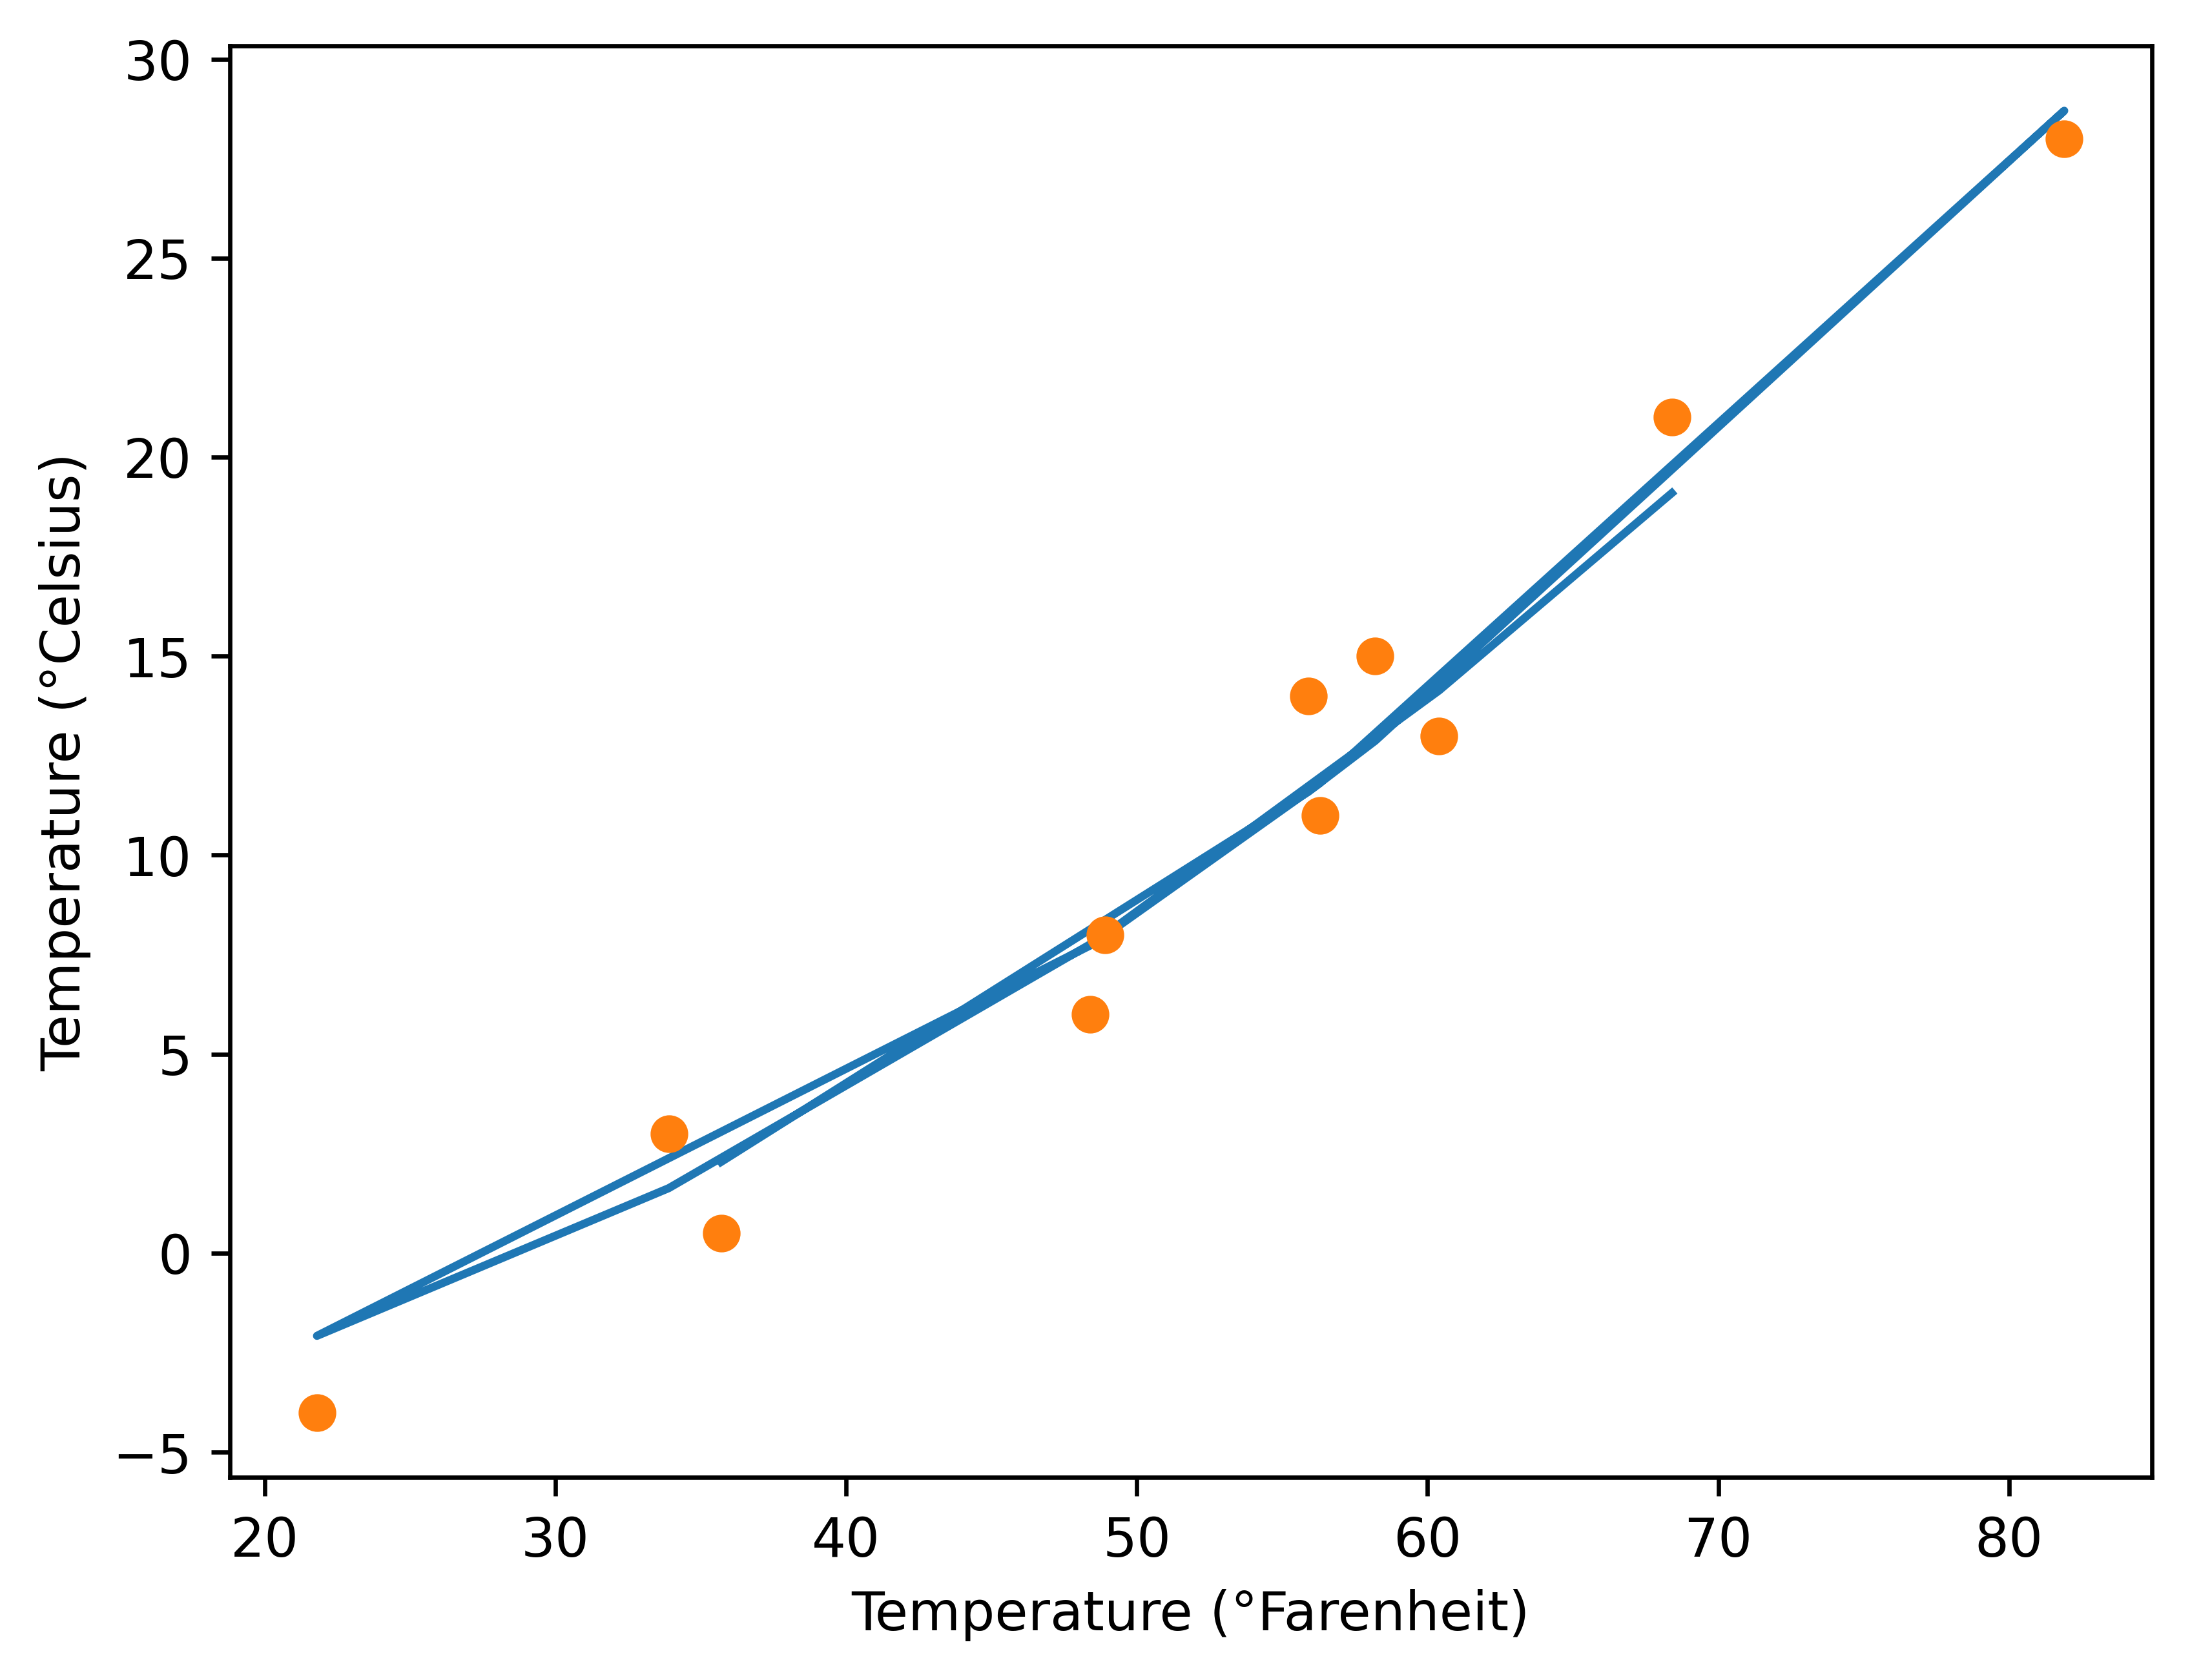

In [18]:
from matplotlib import pyplot as plt
#t_un = 0.1 * t_u
t_p = model(t_un, *params)
fig = plt.figure(dpi=600)
plt.xlabel('Temperature (°Farenheit)')
plt.ylabel('Temperature (°Celsius)')
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')

In [19]:
params = torch.tensor([1.0,1.0,0.0], requires_grad=True)
learning_rate = 0.001
optimizer = optim.Adam([params], lr = learning_rate)

training_loop(
    n_epochs=5000,
    optimizer = optimizer,
    params = params,
    train_t_u = train_t_un,
    train_t_c = train_t_c,
    val_t_u = val_t_un,
    val_t_c = val_t_c)

Epoch 1, Training loss 679.9107, Validation loss 657.2705
Epoch 500, Training loss 104.8493, Validation loss 95.8701
Epoch 1000, Training loss 11.9963, Validation loss 15.1404
Epoch 1500, Training loss 6.8262, Validation loss 13.6121
Epoch 2000, Training loss 6.5204, Validation loss 13.5697
Epoch 2500, Training loss 6.2206, Validation loss 13.0254
Epoch 3000, Training loss 5.8669, Validation loss 12.3400
Epoch 3500, Training loss 5.4667, Validation loss 11.5379
Epoch 4000, Training loss 5.0341, Validation loss 10.6316
Epoch 4500, Training loss 4.5905, Validation loss 9.6464
Epoch 5000, Training loss 4.1634, Validation loss 8.6207


tensor([ 0.0037,  0.4314, -1.6628], requires_grad=True)

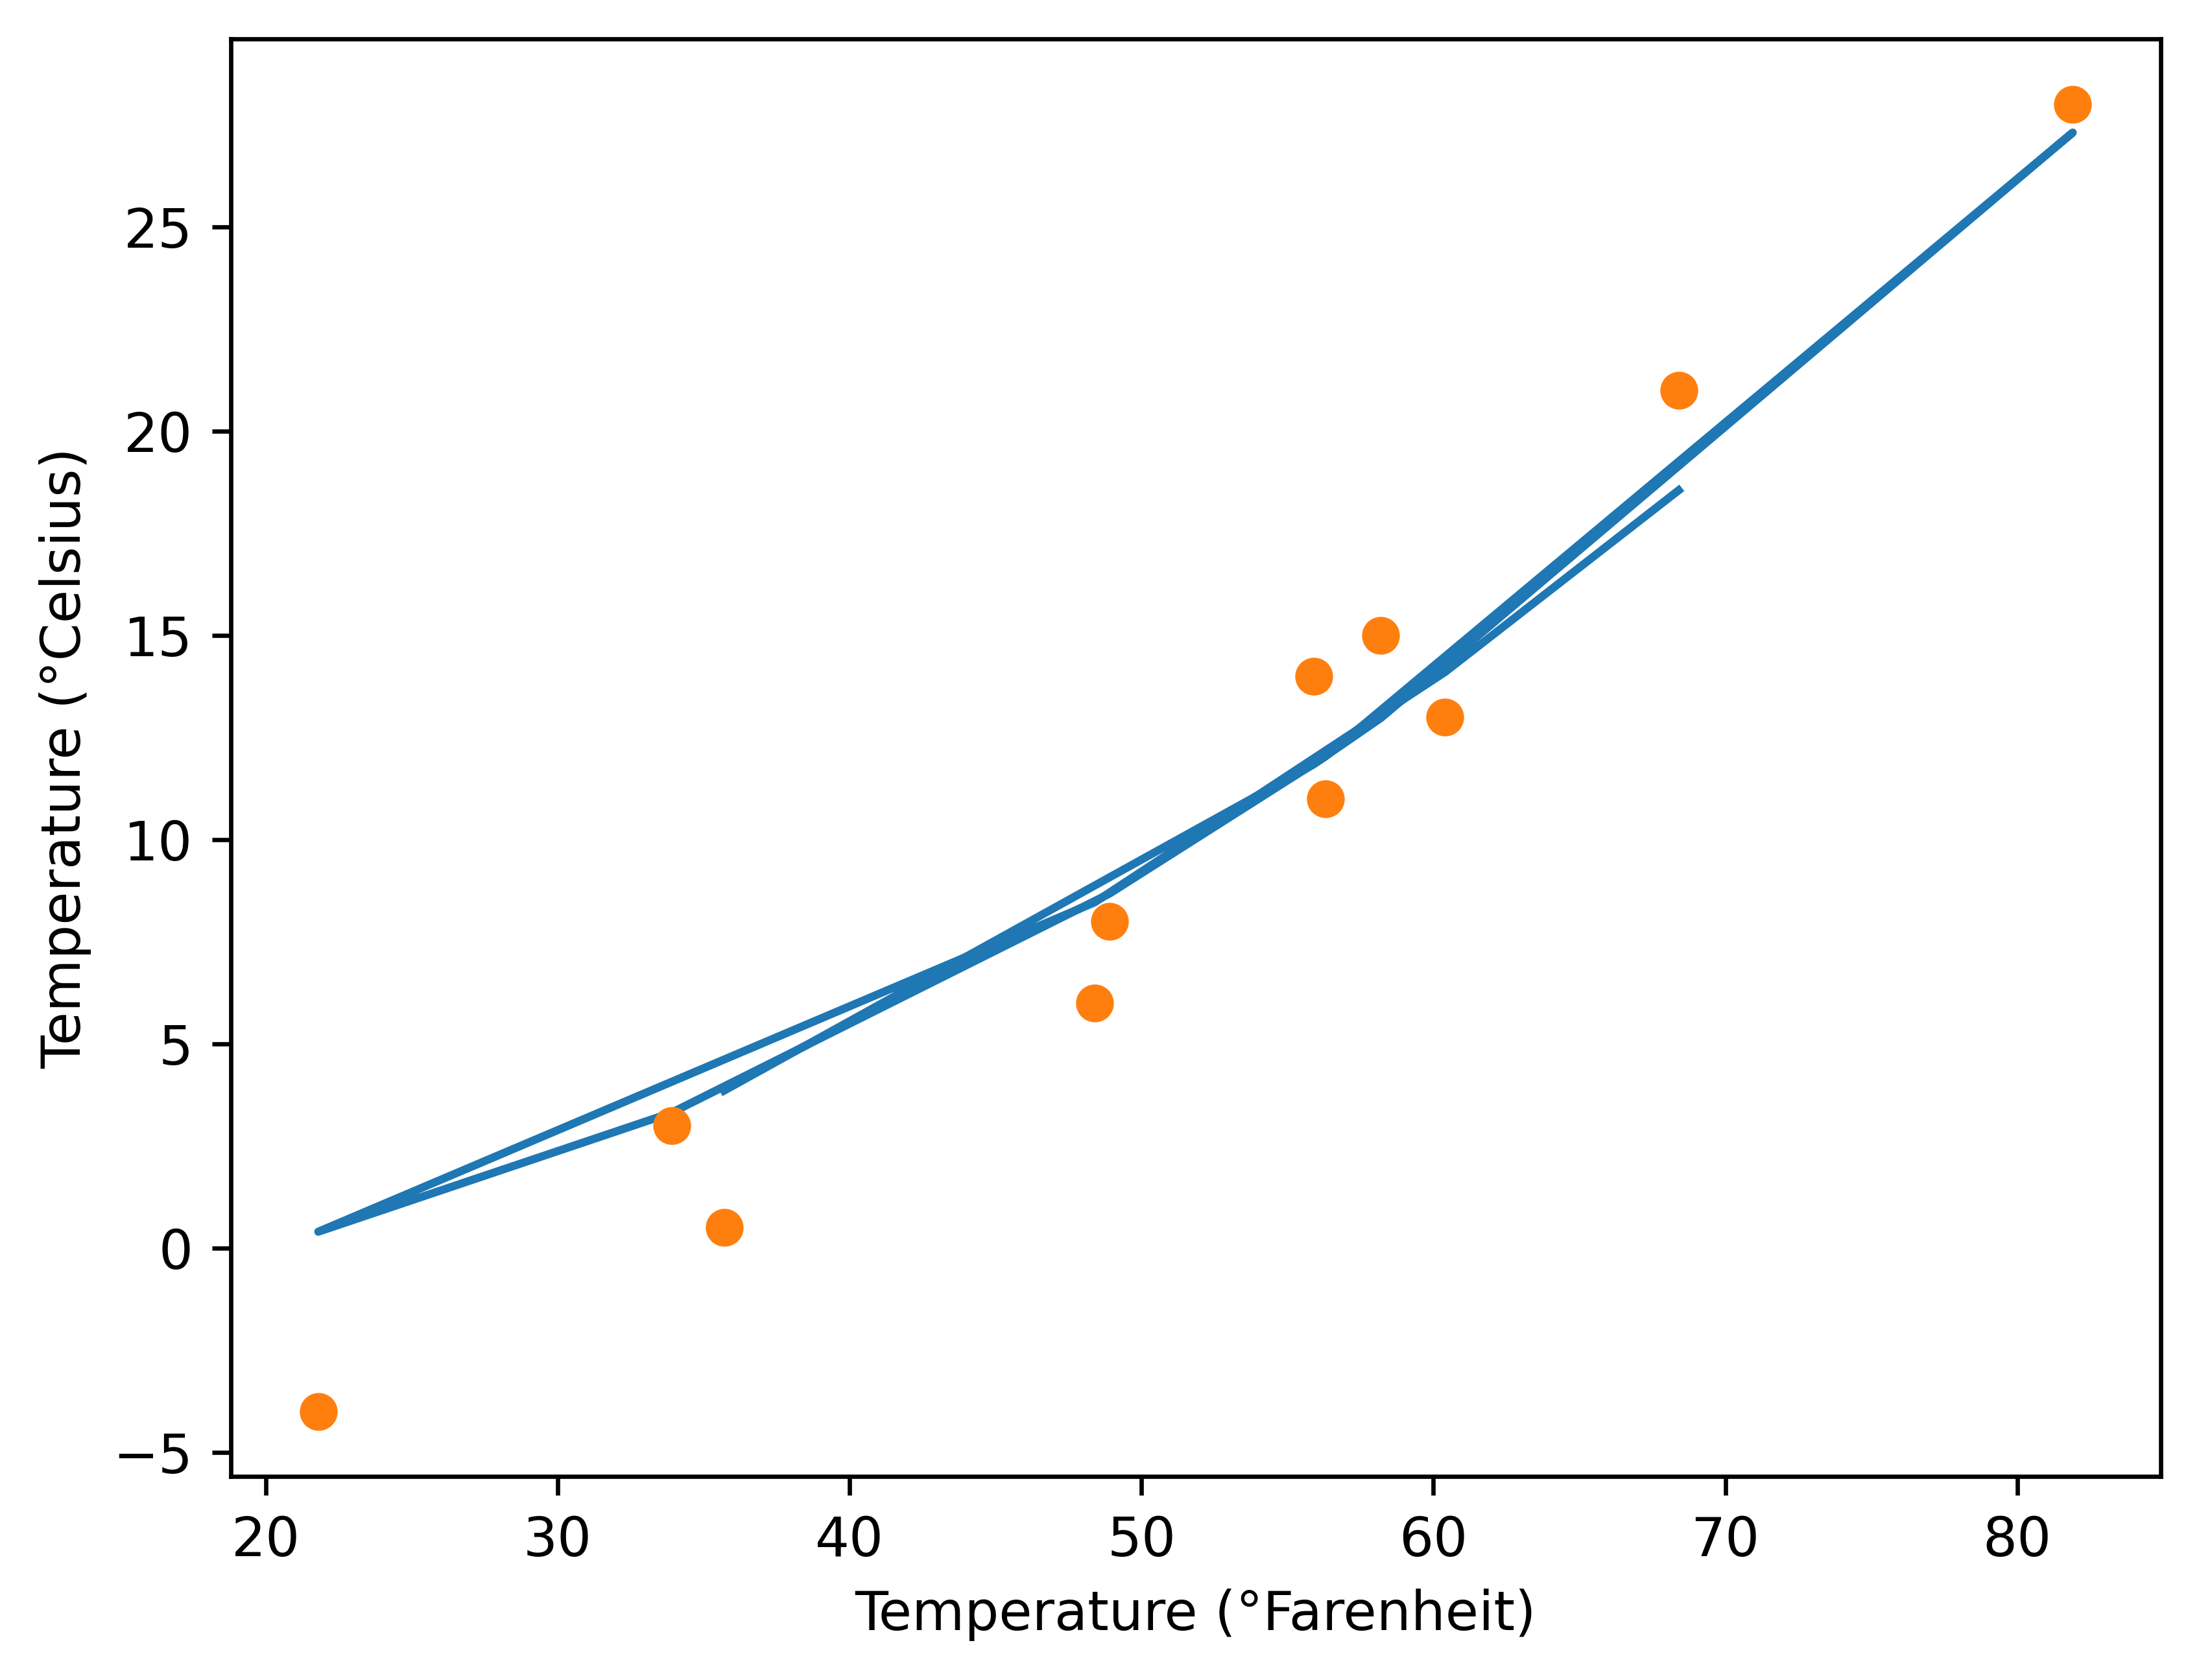

In [20]:
from matplotlib import pyplot as plt
#t_un = 0.1 * t_u
t_p = model(t_un, *params)
fig = plt.figure(dpi=600)
plt.xlabel('Temperature (°Farenheit)')
plt.ylabel('Temperature (°Celsius)')
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')

In [21]:
params = torch.tensor([1.0,1.0,0.0], requires_grad=True)
learning_rate = 0.0001
optimizer = optim.Adam([params], lr = learning_rate)

training_loop(
    n_epochs=5000,
    optimizer = optimizer,
    params = params,
    train_t_u = train_t_un,
    train_t_c = train_t_c,
    val_t_u = val_t_un,
    val_t_c = val_t_c)

Epoch 1, Training loss 679.9107, Validation loss 657.2705
Epoch 500, Training loss 582.2117, Validation loss 560.3727
Epoch 1000, Training loss 494.9816, Validation loss 474.1467
Epoch 1500, Training loss 417.3523, Validation loss 397.7038
Epoch 2000, Training loss 348.4384, Validation loss 330.1431
Epoch 2500, Training loss 287.5193, Validation loss 270.7296
Epoch 3000, Training loss 234.0035, Validation loss 218.8581
Epoch 3500, Training loss 187.3962, Validation loss 174.0197
Epoch 4000, Training loss 147.2693, Validation loss 135.7702
Epoch 4500, Training loss 113.2338, Validation loss 103.7019
Epoch 5000, Training loss 84.9140, Validation loss 77.4163


tensor([ 0.5694,  0.5713, -0.4336], requires_grad=True)

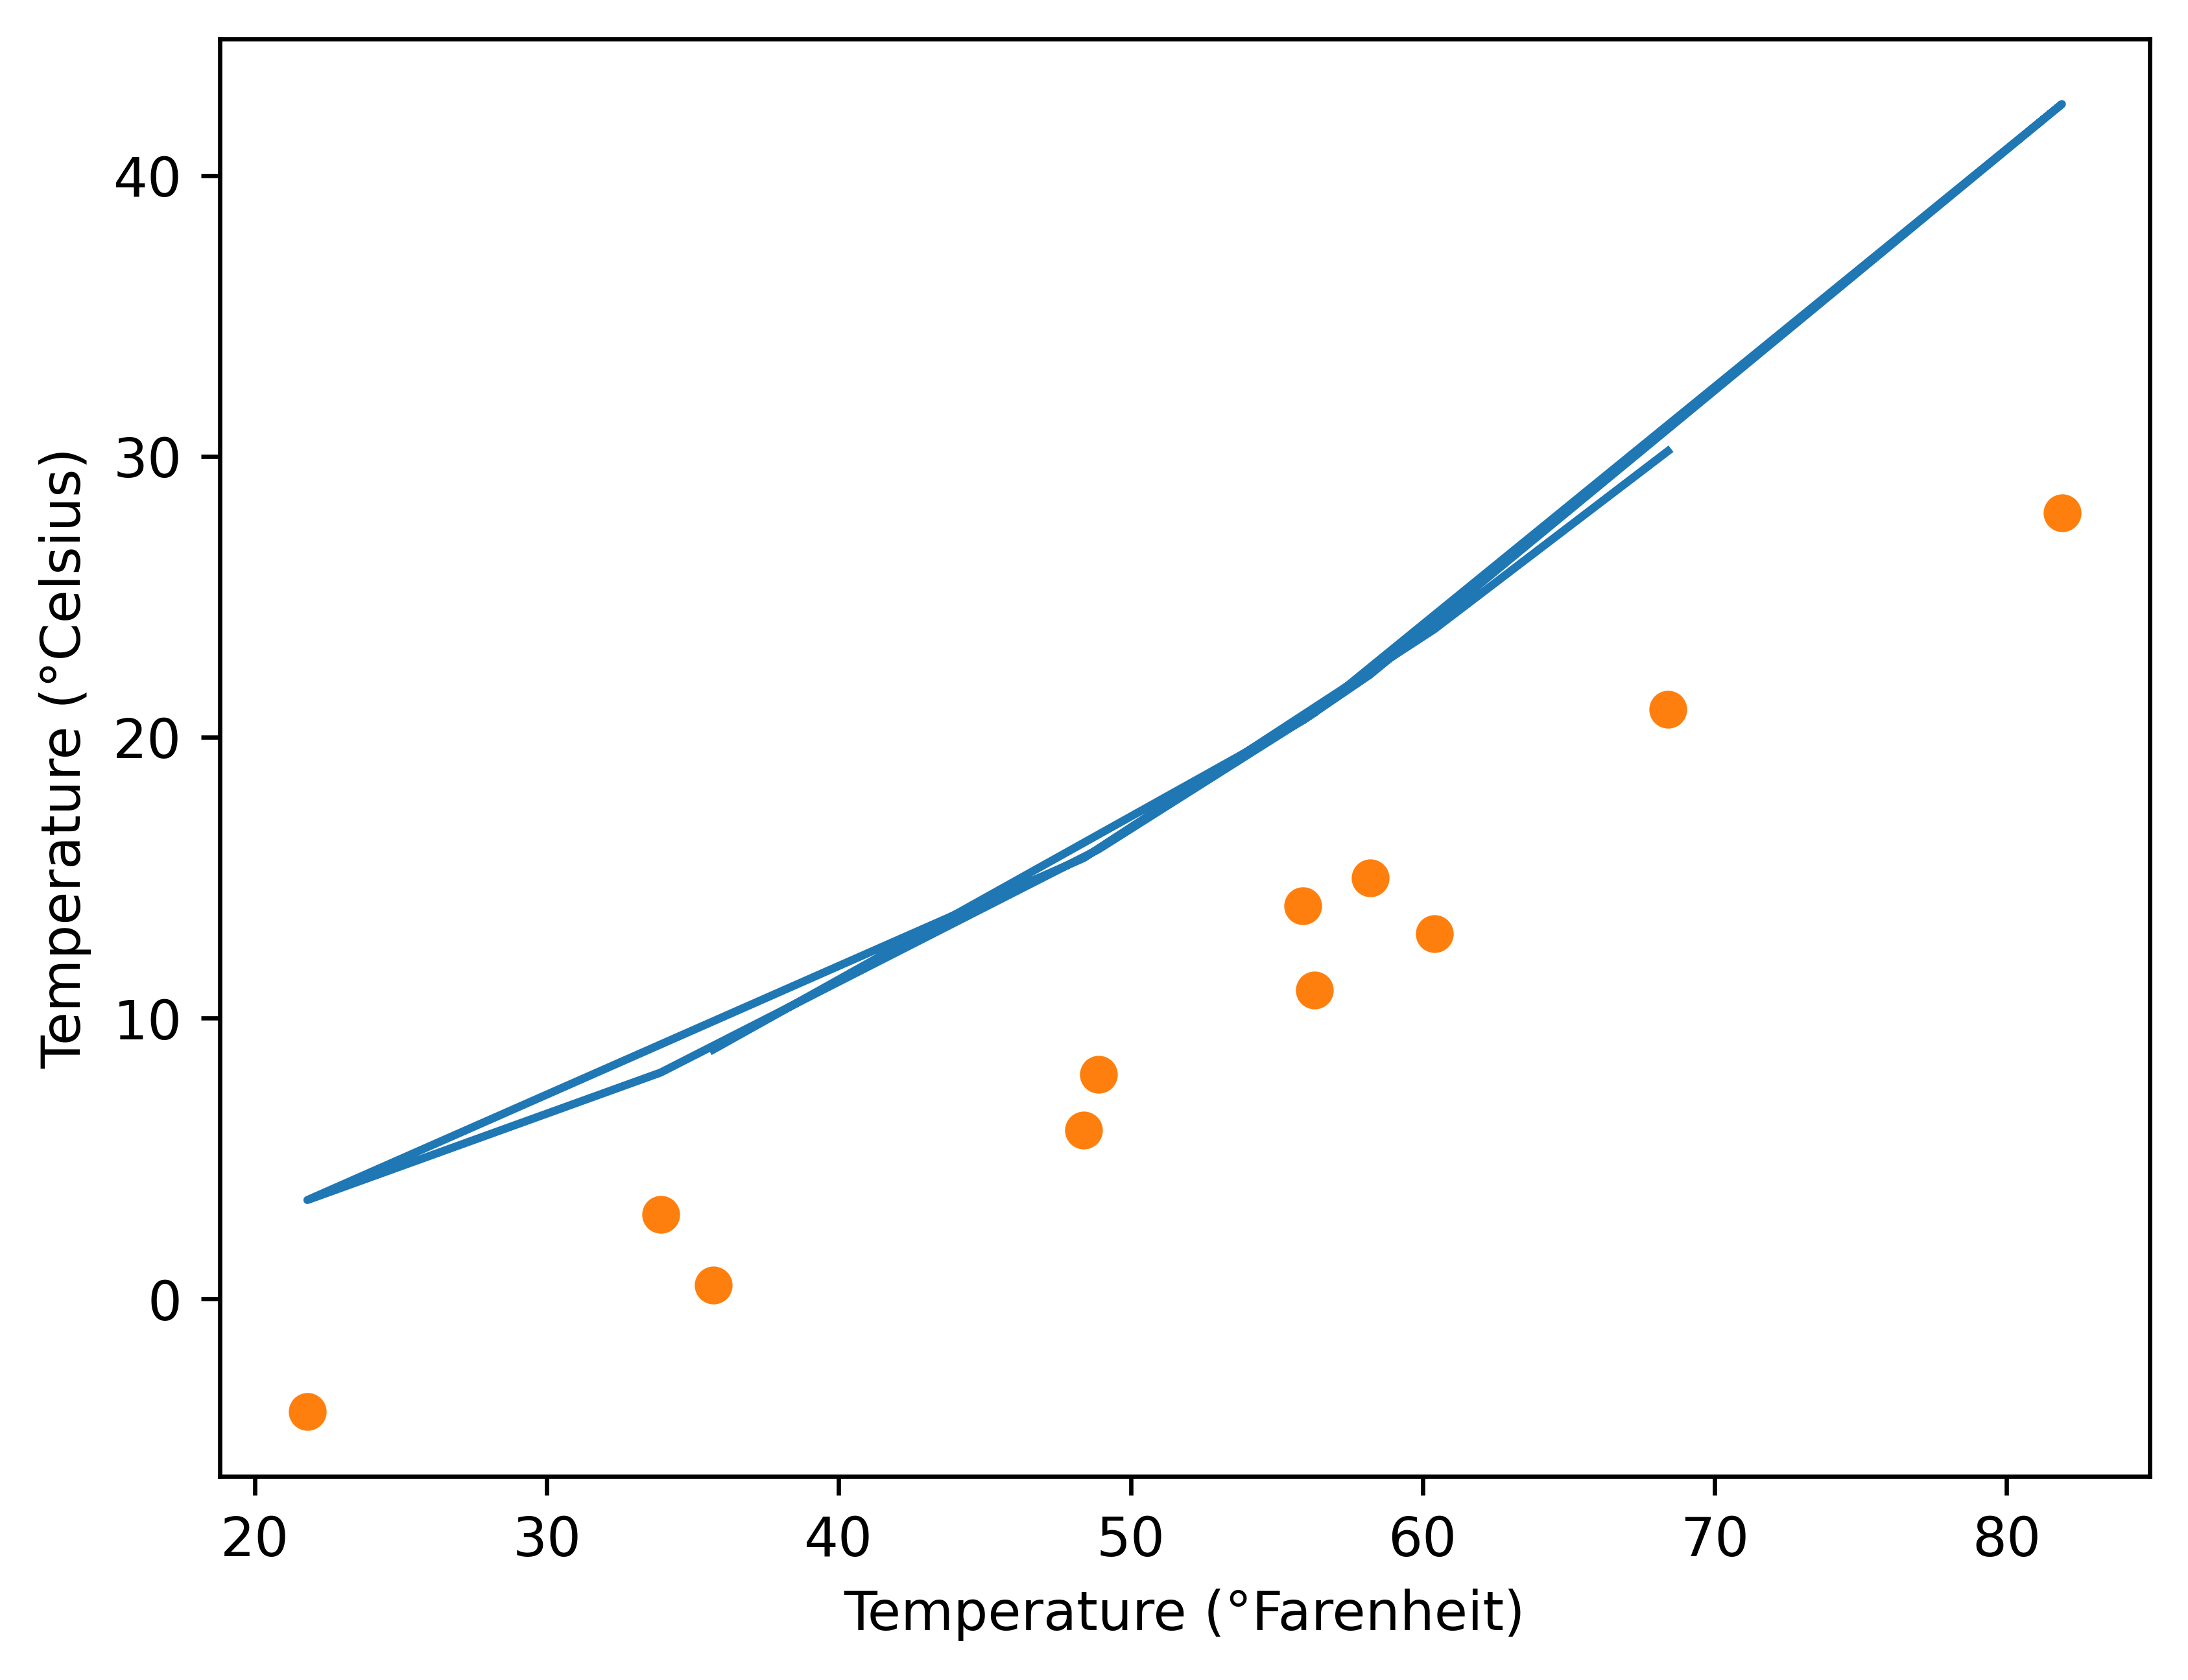

In [22]:
from matplotlib import pyplot as plt
#t_un = 0.1 * t_u
t_p = model(t_un, *params)
fig = plt.figure(dpi=600)
plt.xlabel('Temperature (°Farenheit)')
plt.ylabel('Temperature (°Celsius)')
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')